# Simulate and estimate multivariate time series models

The goal is to get acquainted with multivariate TS models and tests in a controlled environment (=simulated data). Since we control the environment (=the true data-generating process is known) we abstract from practical failures (e.g. outliers, breaks, model-uninformative data). Instead, we inspect properties of TS models and gain intuition.        


Ex. 1 
1. Simulate data from a weakly stationary VAR(1) with p=2, vec(A) = [0.8,0,0.5,0.8]', $\Sigma=I$, without built-in simulation routines. Plot data.  
2. Estimate a VAR model on simulated data. Estimate appropriate lag length. Use eq. 
3. Use eq. by eq. OLS and built-in routines to estimate a VAR(1). Discuss the differences. 
3. Perform tests for: Granger causality, xx, xx.   


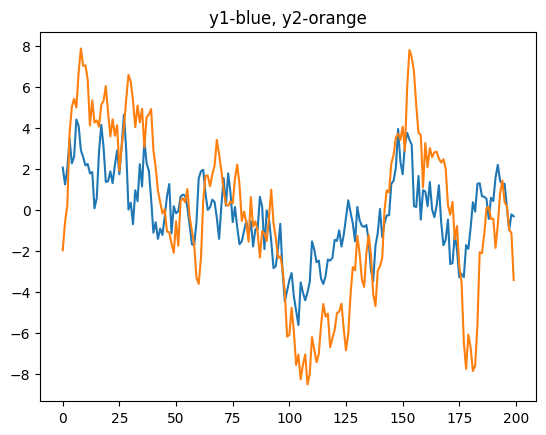

In [3]:
# initialize packages
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
                                                                                                                                
# set burn-in observations (to wash out the effect of initial values), the number of observations and number of series
nburn = 100
nobs  = 200
n     = 2

# set AR coefficient value
A = np.array([[.8,.0],[.5,.8]])

# draw white-noise errors (N~(0,1))
e = np.random.standard_normal([nburn+nobs,n])

# empty place-holder for the AR series 
y = np.zeros([nburn+nobs,n])

# simulate AR(1) process
for i in range(1,nburn+nobs):
    y[[i],:] = y[[i-1],:]@np.transpose(A) + e[[i],:]

# drop burn-in observations
y = y[nburn:]

# plot series
plt.plot(y)
plt.title("y1-blue, y2-orange");
# print(np.corrcoef(y[:,0],y[:,1]))
# print(y.shape)
# print(np.transpose(A))

# Can you judge from figure if data is stationary and if it co-moves?


In [4]:
# Choose appropriate lag length 

# Utilize information criteria (max lag = 5) 
# 'select_order' use internal attribute called 'n_totobs.' Numpy does not have this attribute. 
# For this reason we change the data into statsmodels class 'VAR'  
y_var = sm.tsa.VAR(y)

# estimate information criteria and print results (constant is included by default)
res = sm.tsa.VAR.select_order(y_var,5)
res.summary()
# IC implies VAR(1)


,AIC,BIC,FPE,HQIC
0,3.426,3.460,30.76,3.440
1,0.008011*,0.1087*,1.008*,0.04879*
2,0.02713,0.1950,1.028,0.09509
3,0.05218,0.2872,1.054,0.1473
4,0.08413,0.3863,1.088,0.2065
5,0.09677,0.4660,1.102,0.2463


In [5]:
# We can now estimate a VAR(1)

# Let us first estimate the first VAR equation using OLS
Ly_eq1 = y[0:-1,:]
mod = sm.OLS(y[1:,0],sm.add_constant(Ly_eq1))
res = mod.fit()
print("-------OLS - eq.by.eq.-------------")
print(res.summary())

# And compare the results to the Statsmodels built-in routine
print("-------var.fit()-------------")
res = y_var.fit(1)
print(res.summary())

# Are the results the same? 
# What can we say about significance of coefficients in equations 1 and 2? 

-------OLS - eq.by.eq.-------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.4
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           3.17e-58
Time:                        13:46:27   Log-Likelihood:                -286.00
No. Observations:                 199   AIC:                             578.0
Df Residuals:                     196   BIC:                             587.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0

In [6]:
# Test if y2 Granger-causes y1 at lag 1? 
# y2 granger-causes y1 if PAST values of y2 have explanatory power for CURRENT values of y1.  
sm.tsa.stattools.grangercausalitytests(y,1);   
# it seems that y2 does not Granger cause y1. What does this tell you? 

# Test if y1 Granger-causes y2 at lag 1?
sm.tsa.stattools.grangercausalitytests(np.flip(y, 1),1);   
# it seems that y1 Granger causes y2. See also VAR matrix A defined above.  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9178  , p=0.3392  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.9318  , p=0.3344  , df=1
likelihood ratio test: chi2=0.9296  , p=0.3350  , df=1
parameter F test:         F=0.9178  , p=0.3392  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=86.7784 , p=0.0000  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=88.1067 , p=0.0000  , df=1
likelihood ratio test: chi2=72.9433 , p=0.0000  , df=1
parameter F test:         F=86.7784 , p=0.0000  , df_denom=196, df_num=1


In [8]:
# Why does Granger Causality not measure causality? 

# Simulate a VAR(1) with n = 2 by using built-in function. Assume errors are cross-correlated (before varcov = I)
# Set model parameters
A = np.zeros([1, 2, 2])
A[0, :, :] = np.array([[0.8, 0.], [0, 0.8]])
const = np.zeros([2])
Sigma = np.array([[1., .3], [.3, 1.]])
# When simulating VARs make sure the assumed process is stable and well behaved:
# supplied variance-covariance matrix is symmetric and positive definite (its eigenvalues are real and positive) 
print("The eigenvalues of error variance covariance matrix: ", np.linalg.eigvals(Sigma))
# supplied AR dynamics imply stationarity (max abs eigenvalue is less than 1)
print("The max absolute eigenvale of AR dynamics: ",np.max(np.abs(np.linalg.eigvals(A))))


# Simulate data
model = sm.tsa.var.var_model.VARProcess(A, const, Sigma)
y = model.simulate_var(steps=nobs)

The eigenvalues of error variance covariance matrix:  [1.3 0.7]
The max absolute eigenvale of AR dynamics:  0.8


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Oct, 2023
Time:                     13:46:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                 -0.0268132
Nobs:                     199.000    HQIC:                -0.0859213
Log likelihood:          -546.190    FPE:                   0.881523
AIC:                    -0.126109    Det(Omega_mle):        0.855534
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.050329         0.070827           -0.711           0.477
L1.y1         0.804234         0.046364           17.346           0.000
L1.y2         0.036431         0.043355            0.840           0.401

Results for equation 

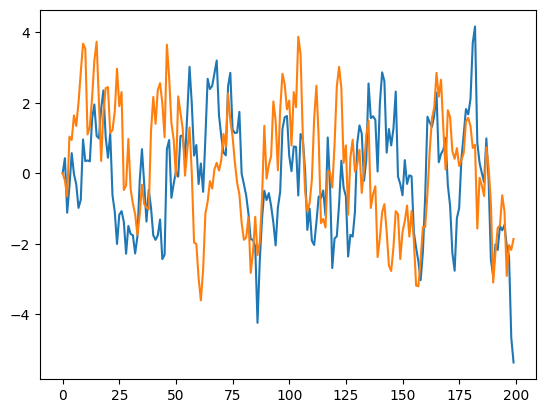

In [9]:
# plot data & estimate model
y_var = sm.tsa.VAR(y)
res = y_var.fit(1)
plt.plot(y)
print(res.summary())    

In [10]:
# Perform Granger causality tests on simulated data
sm.tsa.stattools.grangercausalitytests(y,1);  
sm.tsa.stattools.grangercausalitytests(np.flip(y, 1),1);  
# y1/y2 is not Granger causal for y2/y1. This only implies that lags of y1/y2 are not usefull for predicting  y2/y1. Granger causality is a forecasting-related concept. It does not say anything about causality.  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7061  , p=0.4018  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.7169  , p=0.3972  , df=1
likelihood ratio test: chi2=0.7156  , p=0.3976  , df=1
parameter F test:         F=0.7061  , p=0.4018  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9886  , p=0.1601  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=2.0190  , p=0.1553  , df=1
likelihood ratio test: chi2=2.0089  , p=0.1564  , df=1
parameter F test:         F=1.9886  , p=0.1601  , df_denom=196, df_num=1


In [11]:
# We know that y1 and y2 depend on each other since error variance-covariance matrix is not diagonal. 
# Test for instantaneous correlation 
print(res.test_inst_causality(0))
print(res.test_inst_causality(1))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: y1 does not instantaneously cause y2: reject at 5% significance level. Test statistic: 21.012, critical value: 3.841>, p-value: 0.000>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: y2 does not instantaneously cause y1: reject at 5% significance level. Test statistic: 21.012, critical value: 3.841>, p-value: 0.000>


----------------------------------------------------------------
The max absolute eigenvale of AR dynamics:  0.815602703556717
You can also use the built-in check.Is VAR stable: True
----------------------------------------------------------------
Jarque-Bera-style test for normality of residuals
<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: fail to reject at 5% significance level. Test statistic: 0.049, critical value: 9.488>, p-value: 1.000>
----------------------------------------------------------------
Test if there is no autocorrelation in the residuals up to lag k
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 28.705, critical value: 50.998>, p-value: 0.801>
You can also perform the DW test on the residuals. However, use only as an indicator since DW tes

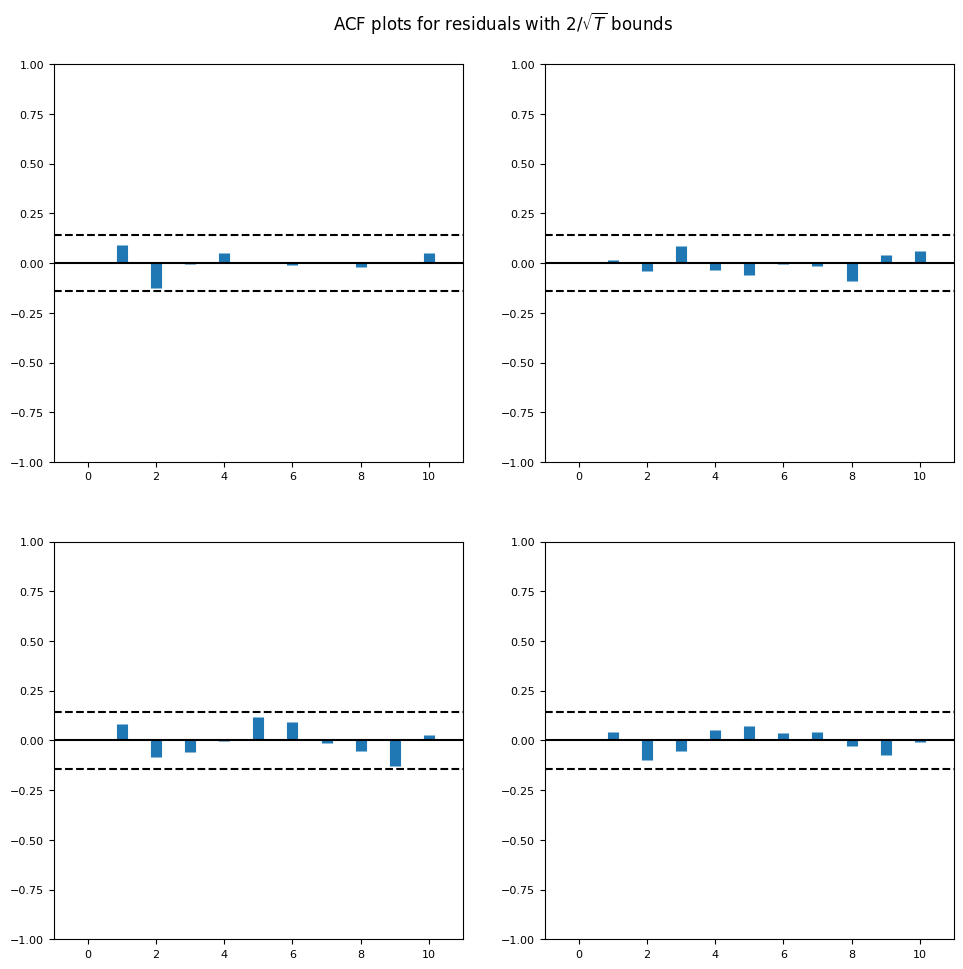

In [12]:
# Perform model checks

# Check if VAR is stable (stationary dynamics, max abs eigenvalue should be smaller than 1)
print("----------------------------------------------------------------")
print("The max absolute eigenvale of AR dynamics: ",np.max(np.abs(np.linalg.eigvals(res.coefs))))
print("You can also use the built-in check.Is VAR stable:", res.is_stable())

# Check if errors are approx. normaly distributed
print("----------------------------------------------------------------")
print("Jarque-Bera-style test for normality of residuals")
print(res.test_normality())

# Test and plot if there is no residual autocorrelation
print("----------------------------------------------------------------")
print("Test if there is no autocorrelation in the residuals up to lag k")
print(res.test_whiteness())
print("You can also perform the DW test on the residuals. However, use only as an indicator since DW test is not designed for models with lags.")
print(sm.stats.durbin_watson(res.resid))


# you can plot auto and cross correlation coefficients
res.plot_acorr();
# You can also print auto and cross-covariances
# print(res.resid_acov(nlags=5))

[[-5.03287892e-02  2.46857822e-02]
 [ 2.85763216e-01 -1.75134523e-01]
 [-9.74129394e-01 -4.43710050e-01]
 [-3.16782012e-01  9.06550357e-01]
 [ 4.43476331e-01  7.65546630e-01]
 [-9.59980763e-03  1.37845841e+00]
 [-2.51287649e-01  1.15187512e+00]
 [-7.67728238e-01  1.73624029e+00]
 [-5.50303140e-01  2.43286618e+00]
 [ 8.54369886e-01  2.99015640e+00]
 [ 3.53926239e-01  2.91462144e+00]
 [ 2.82135400e-01  9.07841010e-01]
 [ 2.69924298e-01  1.08993718e+00]
 [ 1.26941291e+00  1.68709054e+00]
 [ 1.63515909e+00  2.53024685e+00]
 [ 9.37860522e-01  3.02879160e+00]
 [ 8.19308508e-01  1.62422877e+00]
 [ 1.43508532e+00  1.90472237e-01]
 [ 1.90333642e+00  1.30270836e+00]
 [ 8.58134764e-01  1.94692130e+00]
 [ 3.93583323e-01  2.00889665e+00]
 [ 8.98380902e-01  8.95811883e-01]
 [-5.07665927e-01  1.07384754e+00]
 [-8.63156303e-01  1.53857238e+00]
 [-1.55492988e+00  2.60059256e+00]
 [-9.26691496e-01  1.67187232e+00]
 [-8.29663797e-01  1.99405946e+00]
 [-1.17239954e+00 -2.75886787e-01]
 [-1.89875100e+00 -1

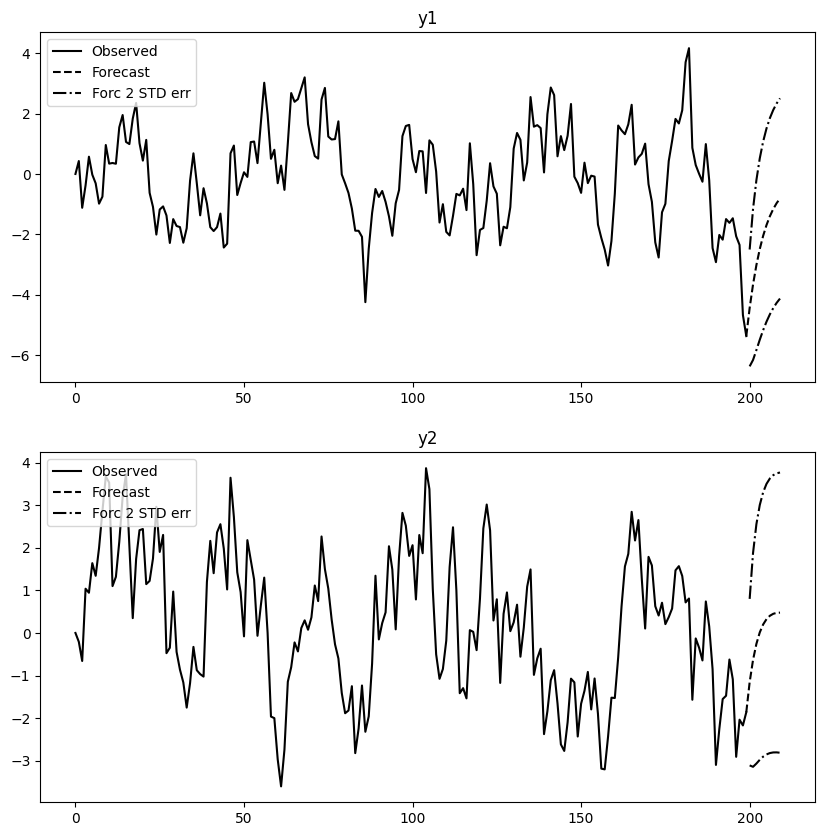

In [13]:
# # fitted values, forecasts
y_fit = res.fittedvalues
# y_fcs = res.forecast(y,10)
# y_fcs_ci = res.forecast_interval(y,10)

# obtain and plot the forecasts (95% confidence intervals, normal errors assumed)
n_fcs = 10
fig = res.plot_forecast(10)
fig.axes[0].legend(loc='upper left');
fig.axes[1].legend(loc='upper left');


print(y_fit)
